<a href="https://colab.research.google.com/github/FerdousJUST/Fish_Classsification_Project_Two/blob/main/Fish_Classification_Project_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])
     

In [7]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [10]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part two/my_model.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [11]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-11-da3407ffa4b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
150/150 - 2067s - loss: 2.3038 - accuracy: 0.4940 - val_loss: 0.7162 - val_accuracy: 0.6967 - lr: 0.0010 - 2067s/epoch - 14s/step
Epoch 2/10
150/150 - 121s - loss: 0.5489 - accuracy: 0.7948 - val_loss: 0.6126 - val_accuracy: 0.7817 - lr: 0.0010 - 121s/epoch - 805ms/step
Epoch 3/10
150/150 - 118s - loss: 0.3266 - accuracy: 0.8842 - val_loss: 0.5754 - val_accuracy: 0.7817 - lr: 0.0010 - 118s/epoch - 788ms/step
Epoch 4/10
150/150 - 118s - loss: 0.2551 - accuracy: 0.9131 - val_loss: 0.4134 - val_accuracy: 0.8625 - lr: 0.0010 - 118s/epoch - 784ms/step
Epoch 5/10
150/150 - 118s - loss: 0.2008 - accuracy: 0.9273 - val_loss: 0.2042 - val_accuracy: 0.9292 - lr: 0.0010 - 118s/epoch - 784ms/step
Epoch 6/10
150/150 - 117s - loss: 0.1310 - accuracy: 0.9535 - val_loss: 0.1354 - val_accuracy: 0.9483 - lr: 0.0010 - 117s/epoch - 777ms/step
Epoch 7/10
150/150 - 121s - loss: 0.1127 - accuracy: 0.9596 - val_loss: 0.1456 - val_accuracy: 0.9517 - lr: 0.0010 - 121s/epoch - 804ms/step
Epoch 8/10
15

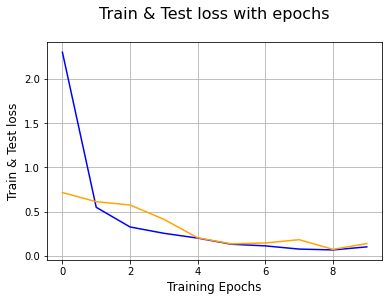

In [12]:

plt.plot(hist.history['loss'],color = 'blue',label = 'train')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()
     

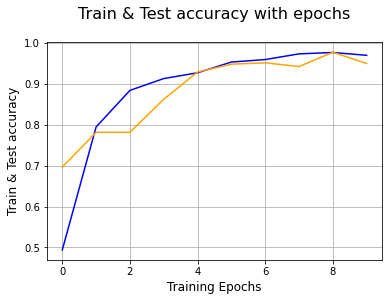

In [13]:
plt.plot(hist.history['accuracy'],color = 'blue',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [14]:

acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 13s - loss: 0.1385 - accuracy: 0.9500 - 13s/epoch - 341ms/step
95.00
